<a href="https://colab.research.google.com/github/vohoaidanh/AIGCDetectBenchmark/blob/main/AIGCDetectBenchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIGCDetectBenchmark


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ftfy
!pip install natsort
!pip install tensorboardX
!pip install blobfile
!pip install mpi4py


In [ ]:
!git clone https://github.com/vohoaidanh/AIGCDetectBenchmark.git

In [ ]:
 file_path = '/content/drive/MyDrive/DATASETS/real_gen_dataset.zip'
 !mkdir -p /content/AIGCDetectBenchmark/dataset
 !unzip "$file_path" -d /content/AIGCDetectBenchmark/dataset

In [5]:
!cp '/content/drive/MyDrive/WEIGHTS/sidd_rgb.pth' /content/AIGCDetectBenchmark/weights/preprocessing

In [6]:
%cd /content/AIGCDetectBenchmark

/content/AIGCDetectBenchmark


In [7]:
#!python test_sidd_rgb_test.py --input_dir dataset/real_gen_dataset --result_dir dataset/data

In [10]:
!python train.py --name test_v1 --dataroot dataset/real_gen_dataset --detect_method CNNSpot --blur_prob 0.1 --blur_sig 0.0,3.0 --jpg_prob 0.1 --jpg_method cv2,pil --jpg_qual 30,100

----------------- Options ---------------
                 CropSize: 224                           
               batch_size: 64                            
                    beta1: 0.9                           
                blur_prob: 0.1                           
                 blur_sig: 0.0,3.0                       
          checkpoints_dir: ./checkpoints                 
                  classes: ['airplane', 'bird', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'cat', 'cow', 'chair', 'diningtable', 'dog', 'person', 'pottedplant', 'motorbike', 'tvmonitor', 'train', 'sheep', 'sofa', 'horse']	[default: airplane,bird,bicycle,boat,bottle,bus,car,cat,cow,chair,diningtable,dog,person,pottedplant,motorbike,tvmonitor,train,sheep,sofa,horse]
           continue_train: False                         
                 data_aug: False                         
                 dataroot: dataset/real_gen_dataset      	[default: /hotdata/share/AIGCDetect]
            detect_method: CNNSp

In [11]:
!cp /content/AIGCDetectBenchmark/checkpoints/test_v1/model_epoch_best.pth /content/drive/MyDrive/WEIGHTS/LNP_model

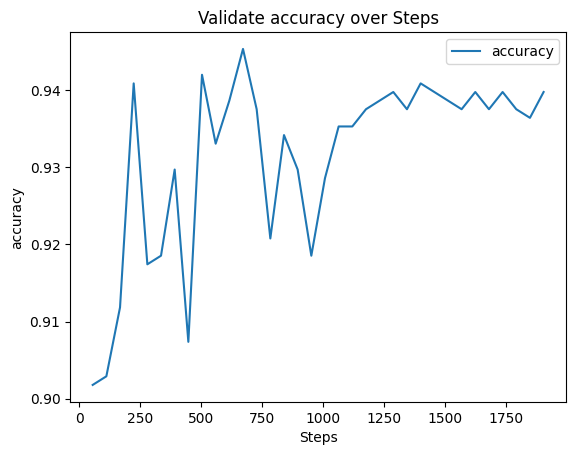

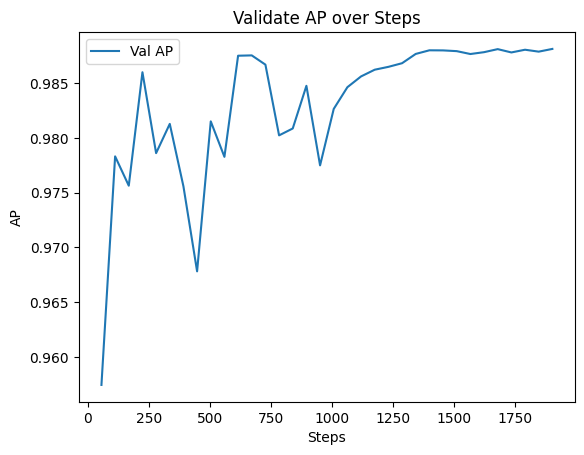

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Đường dẫn đến event file được tạo bởi SummaryWriter
event_file_path = 'checkpoints/test_v1/val/events.out.tfevents.1709021231.311b853584d9'

# Đọc dữ liệu từ event file
summary_iterator = tf.compat.v1.train.summary_iterator(event_file_path)

# Khởi tạo các list để lưu giữ dữ liệu
steps = []
train_losses = []
train_accuracies = []

# Lặp qua từng event trong event file
for event in summary_iterator:
    if event.HasField('summary'):
        for value in event.summary.value:
            if value.tag == 'accuracy':
                steps.append(event.step)
                train_losses.append(value.simple_value)
            elif value.tag == 'ap':
                train_accuracies.append(value.simple_value)

# Vẽ đồ thị train loss
plt.plot(steps, train_losses, label='accuracy')
plt.xlabel('Steps')
plt.ylabel('accuracy')
plt.title('Validate accuracy over Steps')
plt.legend()
plt.show()

# Vẽ đồ thị train accuracy
plt.plot(steps, train_accuracies, label='Val AP')
plt.xlabel('Steps')
plt.ylabel('AP')
plt.title('Validate AP over Steps')
plt.legend()
plt.show()
